In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [3]:
X = dataset.iloc[:,3:5].values

In [4]:
from sklearn.datasets import make_blobs

In [5]:
from sklearn.cluster import OPTICS
Clust =OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.05)
Optics=Clust.fit_predict(X)

C:\Users\ANIRUDH\anaconda3\envs\AIML\lib\site-packages\sklearn\cluster\_optics.py:1081: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [6]:
Optics

array([-1,  3,  4,  3, -1,  3,  4, -1,  4,  3,  4, -1,  4,  3,  4,  3, -1,
        3, -1, -1, -1,  3,  4,  3,  4, -1, -1, -1, -1, -1,  4,  3,  4, -1,
        4, -1,  4,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  0, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1,  2,  1,  2,  2,  1,  1,  1,  2,  1,  2,  1,
       -1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  1,  1,  1,  2, -1,  2,
       -1, -1, -1, -1,  8, -1,  7, -1,  8,  5,  7,  5,  7, -1,  7,  5,  8,
        5,  7,  5,  7,  5,  8, -1,  8,  5,  8, -1,  7,  5,  8,  5,  8,  5,
        7,  5,  8, -1,  7, -1,  7, -1, -1, -1,  8,  6, -1,  6, -1,  6, -1,
        6, -1,  6, -1,  6, -1,  6, -1,  6, -1, -1, -1,  6, -1, -1, -1,  6,
       -1,  6, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [7]:
n_clusters_ = len(set(Optics))

In [8]:
n_clusters_

10

In [9]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import OPTICS

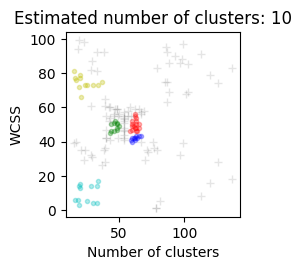

In [10]:
G = gridspec.GridSpec(2, 3)
ax2 = plt.subplot(G[1, 0])
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[Optics == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[Optics == -1, 0], X[Optics == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

In [11]:
supervised=pd.DataFrame(dataset)
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [12]:
supervised['Cluster_group']=Optics
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,-1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


In [13]:
supervised.to_csv("cluster.csv",index=False)

C:\Users\ANIRUDH\anaconda3\envs\AIML\lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


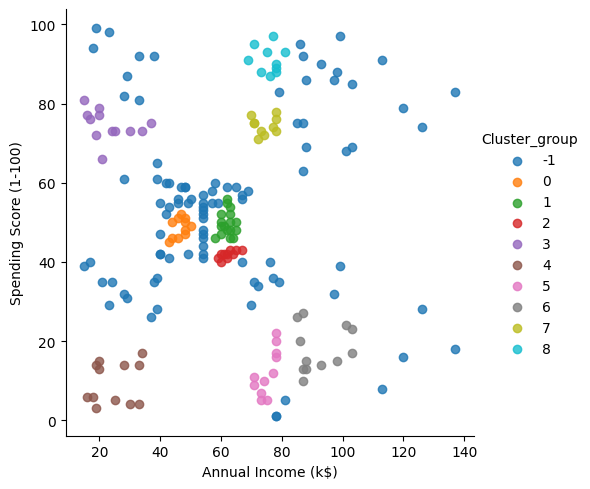

In [14]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[4], hue=supervised.columns[5], 
                   fit_reg=False, legend=True, legend_out=True)